# Vector data analysis

The **vector data model** represents features on the Earth's surface as **points**, **lines** or **polygons**. Vector data is useful for storing and representing data that has discrete boundaries, such as borders, buildings, streets, and roads. Online mapping applications, such as **Google Maps** and **OpenStreetMap**, use this format to display data. 

The Python library `GeoPandas` provides somes great tools for working with vector data. As the name suggests, `GeoPandas` extends the popular data science library `Pandas` by adding support for geospatial data. The core data structure in `GeoPandas` is the `GeoDataFrame`. The key difference between the two is that a `GeoDataFrame` can store geometry data and perform spatial operations.

```{image} images/dataframe.png
:alt: geodataframe
:width: 700px
:align: center
```

The `geometry` column can contain any geometry type (e.g. points, lines, polygons) or even a mixture.

## Reading files

Assuming we have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), we can read it using `read_file()`, which automatically detects the filetype and creates a `GeoDataFrame`. In the this demo, we will be working with a shapefile that contains the states of the contiguous United States. 

In [1]:
import geopandas as gpd

gdf = gpd.read_file('data/us_states.shp')
gdf.head()

,STATEFP,STUSPS,NAME,geometry
0,24,MD,Maryland,"MULTIPOLYGON (((1722285.499 1847164.899, 17253..."
1,19,IA,Iowa,"POLYGON ((-50588.826 2198204.224, -46981.682 2..."
2,10,DE,Delaware,"POLYGON ((1705277.992 2038007.044, 1706136.968..."
3,39,OH,Ohio,"MULTIPOLYGON (((1081987.294 2151544.264, 10846..."
4,42,PA,Pennsylvania,"POLYGON ((1287711.752 2093650.229, 1286266.040..."


In [2]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

```{note} 
The `geometry` column is the **active geometry**. Spatial methods used on the `GeoDataFrame` will use these geometries.
```

## Geometric properties

Since we have a `GeoDataFrame` that is spatially "aware", we can compute the geometric properties for each row. For example, we could make a new column that contains the area of each state:

In [3]:
gdf['area'] = gdf['geometry'].area
gdf.head()

,STATEFP,STUSPS,NAME,geometry,area
0,24,MD,Maryland,"MULTIPOLYGON (((1722285.499 1847164.899, 17253...",2.754245e+10
1,19,IA,Iowa,"POLYGON ((-50588.826 2198204.224, -46981.682 2...",1.456667e+11
2,10,DE,Delaware,"POLYGON ((1705277.992 2038007.044, 1706136.968...",5.324652e+09
3,39,OH,Ohio,"MULTIPOLYGON (((1081987.294 2151544.264, 10846...",1.069777e+11
4,42,PA,Pennsylvania,"POLYGON ((1287711.752 2093650.229, 1286266.040...",1.173572e+11


Or the centroid of each state

In [4]:
gdf['centroid'] = gdf['geometry'].centroid
gdf.head()

,STATEFP,STUSPS,NAME,geometry,area,centroid
0,24,MD,Maryland,"MULTIPOLYGON (((1722285.499 1847164.899, 17253...",2.754245e+10,POINT (1640385.402 1944865.873)
1,19,IA,Iowa,"POLYGON ((-50588.826 2198204.224, -46981.682 2...",1.456667e+11,POINT (205832.463 2121901.888)
2,10,DE,Delaware,"POLYGON ((1705277.992 2038007.044, 1706136.968...",5.324652e+09,POINT (1745372.416 1963739.545)
3,39,OH,Ohio,"MULTIPOLYGON (((1081987.294 2151544.264, 10846...",1.069777e+11,POINT (1109302.074 1996734.113)
4,42,PA,Pennsylvania,"POLYGON ((1287711.752 2093650.229, 1286266.040...",1.173572e+11,POINT (1512084.467 2130516.771)


## Plot

We can use `plot()` to produce a basic vizualisation of the geometries.

<Axes: >

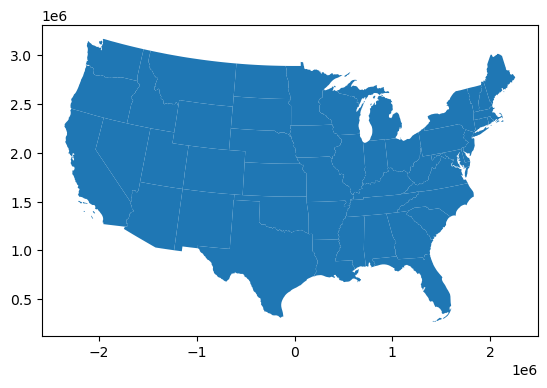

In [5]:
gdf.plot()

We can also explore our data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [6]:
gdf.explore()

Finally, we can plot two geometry columns together, we just need to use one plot as an axis for the other.

<Axes: >

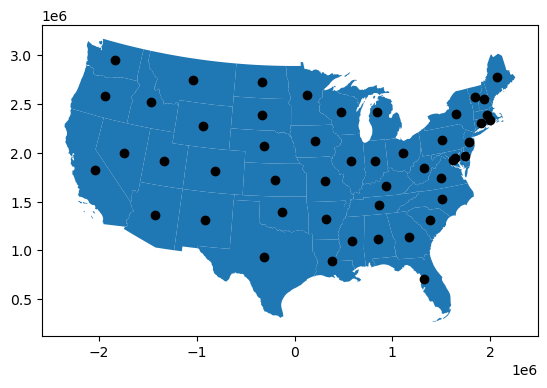

In [7]:
ax = gdf['geometry'].plot()
gdf['centroid'].plot(ax=ax, color='black')

## Indexing

`GeoPandas` inherits the standard `Pandas` methods for indexing/selecting data. We can use integer position based indexing (`iloc`) to select rows:

In [8]:
gdf.iloc[3:6]

,STATEFP,STUSPS,NAME,geometry,area,centroid
3,39,OH,Ohio,"MULTIPOLYGON (((1081987.294 2151544.264, 10846...",1.069777e+11,POINT (1109302.074 1996734.113)
4,42,PA,Pennsylvania,"POLYGON ((1287711.752 2093650.229, 1286266.040...",1.173572e+11,POINT (1512084.467 2130516.771)
5,31,NE,Nebraska,"POLYGON ((-670097.365 2040215.635, -668488.696...",2.003646e+11,POINT (-314201.847 2065223.842)


In [9]:
gdf.iloc[30]

STATEFP                                                    32
STUSPS                                                     NV
NAME                                                   Nevada
geometry    POLYGON ((-2028959.4341761633 2068002.78284196...
area                                      286343437541.051636
centroid         POINT (-1748436.870197715 2002314.685556594)
Name: 30, dtype: object

It is also possible to select a subset of data based on a **mask**, with the syntax `df[df['column_name'] == 'some value']`. This operation selects only the rows where this condition is true:

In [10]:
gdf[gdf['NAME'] == 'Oregon']

,STATEFP,STUSPS,NAME,geometry,area,centroid
15,41,OR,Oregon,"POLYGON ((-2285910.272 2550894.134, -2276699.4...",2.513754e+11,POINT (-1943081.490 2579189.994)


Sometimes we might want to select rows where a column value is in **list** of values

In [11]:
western_states = ['Oregon', 'Washington', 'California']
gdf[gdf['NAME'].isin(western_states)]

,STATEFP,STUSPS,NAME,geometry,area,centroid
6,53,WA,Washington,"MULTIPOLYGON (((-2000237.694 3142051.285, -198...",1.788164e+11,POINT (-1840167.993 2949083.273)
11,06,CA,California,"MULTIPOLYGON (((-2066284.899 1402243.639, -205...",4.105166e+11,POINT (-2043435.932 1824815.053)
15,41,OR,Oregon,"POLYGON ((-2285910.272 2550894.134, -2276699.4...",2.513754e+11,POINT (-1943081.490 2579189.994)


In [12]:
# Select all states with an area larger than 3.5e+11 m2
gdf[gdf['area'] > 3.5e+11]

,STATEFP,STUSPS,NAME,geometry,area,centroid
10,48,TX,Texas,"POLYGON ((-998043.807 1038046.289, -997956.109...",6.926631e+11,POINT (-312496.251 936222.085)
11,06,CA,California,"MULTIPOLYGON (((-2066284.899 1402243.639, -205...",4.105166e+11,POINT (-2043435.932 1824815.053)
25,30,MT,Montana,"POLYGON ((-1474367.320 3044425.629, -1434636.1...",3.806067e+11,POINT (-1037341.467 2747065.255)


<Axes: >

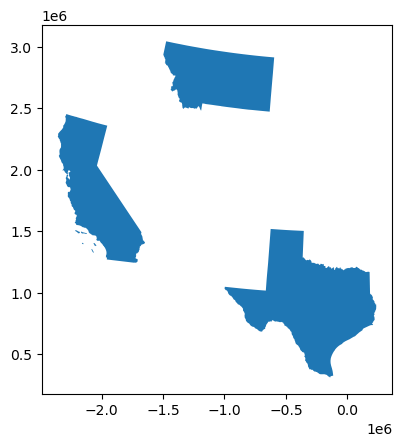

In [13]:
# Plot all states with an area larger than 2.5e+11 m2
gdf[gdf['area'] > 3.5e+11].plot()

## Projections

`GeoDataFrames` have their own **Coordinate Reference System (CRS)** which can be accessed using the [`crs`](https://geopandas.org/en/stable/docs/user_guide/projections.html) method. The CRS tells `GeoPandas` where the coordinates of the geometries are located on the Earth's surface. If we run this on our data, we will see that it has an **Albers Equal Area** projection.

In [14]:
gdf.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We can reproject a our data using the `to_crs` method.

In [15]:
gdf_reproject = gdf.to_crs('EPSG:4326')
gdf_reproject.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

```{tip}
It is recommended to use an EPSG code for specifying projections. We can find the right EPSG code using this site: https://epsg.io/
```

Now we will see that our `geometry` column contains longitudes and latitudes (i.e. in degrees). It also looks a bit different when we plot it (also note the x- y-axis scales). 

In [16]:
gdf_reproject.head()

,STATEFP,STUSPS,NAME,geometry,area,centroid
0,24,MD,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ...",2.754245e+10,POINT (1640385.402 1944865.873)
1,19,IA,Iowa,"POLYGON ((-96.62188 42.77925, -96.57794 42.827...",1.456667e+11,POINT (205832.463 2121901.888)
2,10,DE,Delaware,"POLYGON ((-75.77378 39.72220, -75.75323 39.757...",5.324652e+09,POINT (1745372.416 1963739.545)
3,39,OH,Ohio,"MULTIPOLYGON (((-82.86334 41.69369, -82.82571 ...",1.069777e+11,POINT (1109302.074 1996734.113)
4,42,PA,Pennsylvania,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",1.173572e+11,POINT (1512084.467 2130516.771)


<Axes: >

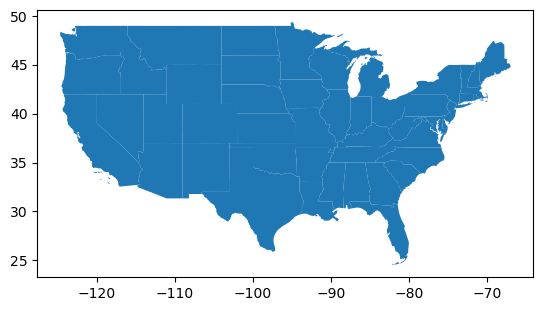

In [17]:
gdf_reproject.plot()

```{note}
Sometimes `GeoPandas` won't recognize the EPSG code. In this case, we can navigate to [epsg.io](https://epsg.io/) and use the projection **description** to reproject the data. If there isn't a description, scroll down to `PROJ.4` in the **Export** menu and copy and paste from there. 
```

<Axes: >

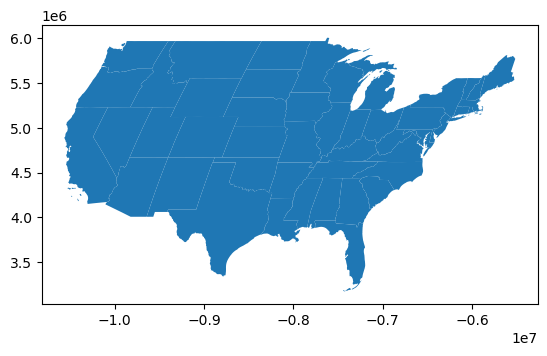

In [18]:
# Reproject to World Eckert IV (https://epsg.io/54012)
proj = '+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'
gdf_reproject = gdf_reproject.to_crs(proj)
gdf_reproject.plot()

## Writing files

We can write a `GeoDataFrame` back to file using `GeoDataFrame.to_file()`. The default file format is a **shapefile**. Note that we can only have one `geometry` column so we drop the `centroid` column before writing.

In [19]:
gdf_reproject.drop(columns=['centroid']).to_file('data/us_states_wgs84.shp')